<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/Voting_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install wandb -qqq

In [ ]:
# implement hard and soft voting classifier

# Import the required libraries
import numpy as np
from sklearn import datasets, linear_model, svm, neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
# import the voting classifier
from sklearn.ensemble import VotingClassifier
# import the voting regressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#import wandb

In [ ]:
# Load the dataset
breast_cancer = datasets.load_breast_cancer()
x, y = breast_cancer.data, breast_cancer.target

print(x.shape)
print(y.shape)

# Split the train and test samples
test_samples = 100
x_train, y_train = x[:-test_samples], y[:-test_samples]
x_test, y_test = x[-test_samples:], y[-test_samples:]

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)
print(y_train.shape)
print(y_test.shape)

(569, 30)
(569,)
(426,)
(143,)


In [ ]:
# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = linear_model.Perceptron(tol=1e-2, random_state=0)
learner_3 = svm.SVC(kernel='rbf', probability=True, gamma=0.001)  #kernel='poly' or 'rbf'
learner_4 = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=300,activation = 'logistic',solver='adam',random_state=42) # how many trianable parameters?

# Fit classifier with the training data. (try a pipeline instead of the model)
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)
learner_4.fit(x_train, y_train)

# Get the base learner predictions
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)
predictions_4 = learner_4.predict(x_test)

# Accuracies of base learners
print('L1:', np.round(accuracy_score(y_test, predictions_1),2))
print('L2:', np.round(accuracy_score(y_test, predictions_2),2))
print('L3:', np.round(accuracy_score(y_test, predictions_3),2))
print('L4:', np.round(accuracy_score(y_test, predictions_4),2))

print('F1-score(L1):', np.round(f1_score(y_test, predictions_1),2))
print('F1-score(L2):', np.round(f1_score(y_test, predictions_2),2))
print('F1-score(L3):', np.round(f1_score(y_test, predictions_3),2))
print('F1-score(L4):', np.round(f1_score(y_test, predictions_4),2))


L1: 0.93
L2: 0.85
L3: 0.9
L4: 0.93
F1-score(L1): 0.95
F1-score(L2): 0.88
F1-score(L3): 0.92
F1-score(L4): 0.94


Missclassified:  11
11
(143,)
7.6923076923076925
92.3076923076923
------------------------------
Hard voting: 0.9230769230769231
[0 1]


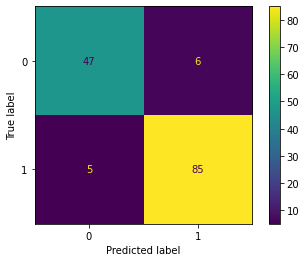

In [ ]:
##initial a project for record
#wandb.init(project="Voting_classifier")
#config = wandb.config

# create a voting classifier with hard voting: select odd number of individual models to avoid not having equal votes
voting_hard_classifier = VotingClassifier(estimators = [('KNN', learner_1),
                                                        #('Perc', learner_2),
                                                        ('SVM',  learner_3),
                                                        ('MLP', learner_4)
                                                        ],voting='hard', weights=[1,1,1])

# Fit classifier with the training data
voting_hard_classifier.fit(x_train, y_train)

# Predict the most voted class (most probable class)
hard_predictions = voting_hard_classifier.predict(x_test)
print('Missclassified: ', np.abs(y_test-hard_predictions).sum())

err = np.sum(y_test!=hard_predictions)/y_test.shape[0]      #number of missclassified cases
print(np.sum(y_test!=hard_predictions))
print(y_test.shape)
print(err*100)
print((1-err)*100)

# Evaluate both models
print('-'*30)
print('Hard voting:', accuracy_score(y_test, hard_predictions, normalize = True))
print(voting_hard_classifier.classes_)
cm = confusion_matrix(y_test, hard_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_hard_classifier.classes_)
#plot_confusion_matrix(voting_hard_classifier, x_test, y_test, cmap=plt.cm.Blues)
disp.plot()
#plt.show()

#wandb.log({"acc":hard_predictions})

In [ ]:
# compare between base learners and the hard_voter
print('Model1:\n',np.abs(y_test-predictions_1))
#print('Missclassified: ', np.abs(y_test-predictions_1).sum())
print('Model2:\n',np.abs(y_test-predictions_2))
#print('Missclassified: ', np.abs(y_test-predictions_2).sum())
print('Model3:\n',np.abs(y_test-predictions_3))
#print('Missclassified: ', np.abs(y_test-predictions_3).sum())
#print('Model4:\n',np.abs(y_test-predictions_4))
#print('Missclassified: ', np.abs(y_test-predictions_4).sum())
print('L1:\n', predictions_1)
print('L2:\n', predictions_2)
print('L3:\n', predictions_3)
print('L4:\n', predictions_4)

print('Hard_predictions:\n', hard_predictions)
print('\n',np.abs(y_test-hard_predictions))


Model1:
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
Model2:
 [0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0]
Model3:
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
L1:
 [1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 0 1 0

Soft voting: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        53
           1       0.93      0.94      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



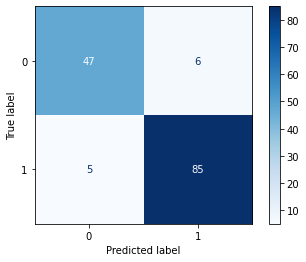

In [ ]:
# create a voting classifier with soft voting
classifiers = [('KNN', learner_1),('SVM',  learner_3), ('MLP', learner_4)]
voting_soft_classifier = VotingClassifier(estimators = classifiers, voting='soft', weights=[1.0,1.0,1.0])

voting_soft_classifier.fit(x_train, y_train)

soft_predictions = voting_soft_classifier.predict(x_test)

#print(np.c_[y_test, soft_predictions])
print('Soft voting:', accuracy_score(y_test, soft_predictions))

confusion_matrix(y_test, soft_predictions)
print(classification_report(y_test, soft_predictions))

#plot_confusion_matrix(voting_soft_classifier, x_test, y_test, cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_estimator(voting_hard_classifier, x_test, y_test, cmap=plt.cm.Blues)
plt.show()